In [1]:
import torch
import numpy as np
import os
import os.path as op
from matplotlib import cm
import matplotlib.pyplot as plt
import math
import torch.nn.functional as F
from datahandling import AlexNetDataHandler
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
### test_file_roi = "/pasteur/appa/scratch/cbangu/coefficients/covert_producing_roi_beamforming/BCOM_13_2_ti_166_coefficients.npy"
roi_array = np.load(test_file_roi, mmap_mode="r")

In [150]:
roi_array.shape

(247, 100, 401)

In [153]:
test_file = "/pasteur/appa/scratch/cbangu/coefficients/covert_producing/BCOM_13_3_ma_132_coefficients_7.npy"
array = np.load(test_file, mmap_mode="r")

In [154]:
for epoch, sensors in enumerate(array):
    print(epoch)
    print(sensors.shape)

0
(100, 401)
1
(100, 401)
2
(100, 401)
3
(100, 401)
4
(100, 401)
5
(100, 401)
6
(100, 401)
7
(100, 401)
8
(100, 401)
9
(100, 401)
10
(100, 401)
11
(100, 401)
12
(100, 401)
13
(100, 401)
14
(100, 401)
15
(100, 401)
16
(100, 401)
17
(100, 401)
18
(100, 401)
19
(100, 401)
20
(100, 401)
21
(100, 401)
22
(100, 401)
23
(100, 401)
24
(100, 401)
25
(100, 401)
26
(100, 401)
27
(100, 401)
28
(100, 401)
29
(100, 401)
30
(100, 401)
31
(100, 401)
32
(100, 401)
33
(100, 401)
34
(100, 401)
35
(100, 401)
36
(100, 401)
37
(100, 401)
38
(100, 401)
39
(100, 401)
40
(100, 401)
41
(100, 401)
42
(100, 401)
43
(100, 401)
44
(100, 401)
45
(100, 401)
46
(100, 401)
47
(100, 401)
48
(100, 401)
49
(100, 401)
50
(100, 401)
51
(100, 401)
52
(100, 401)
53
(100, 401)
54
(100, 401)
55
(100, 401)
56
(100, 401)
57
(100, 401)
58
(100, 401)
59
(100, 401)
60
(100, 401)
61
(100, 401)
62
(100, 401)
63
(100, 401)
64
(100, 401)
65
(100, 401)
66
(100, 401)
67
(100, 401)
68
(100, 401)
69
(100, 401)
70
(100, 401)
71
(100, 401)
72

In [156]:
array.shape

(247, 100, 401)

In [30]:
for i in range(len(array)):
    print(array[i].min(), array[i].max())

-4.373938310280188 60.690252001144145
-5.778329131581178 65.32019397892233
-5.836586255729488 136.33146207887052
-5.4678715707232906 64.18039349791732
-4.737615244913817 85.00958003562725
-5.87743353408713 80.58848504223607
-5.700581412219978 105.07609166362481
-5.5109513479872225 95.98951905505164
-4.855264675826556 99.02591877528326
-5.17171545777219 92.31910147873263
-6.330112126071054 54.60745703607716
-5.642120133395236 56.19380503358647
-6.527559853976639 56.364821820629984
-5.645589294339848 87.76521353315655


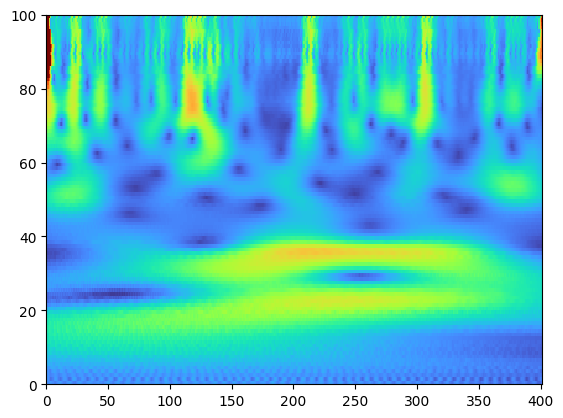

In [157]:
plt.pcolormesh(array[0], cmap='turbo', vmin=-2.47, vmax=6.36)

In [107]:
array[0][0].shape.

(100, 401)

In [111]:
p_array = []
for epoch in array:
    for sensor in epoch:
        p_array.append(np.percentile(sensor, 99))
    break
np.array(p_array).mean()

np.float64(4.38762827749716)

In [38]:
test_file_2 = "/pasteur/appa/scratch/cbangu/coefficients/covert_reading/BCOM_13_2_ti_66_coefficients.npy"
array_2 = np.load(test_file_2, mmap_mode="r")

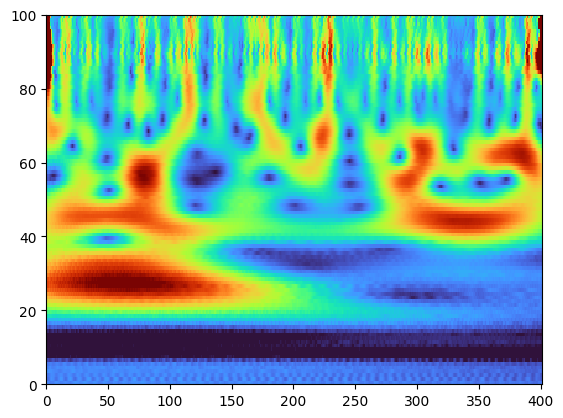

In [147]:
plt.pcolormesh(array_2[4][40], cmap='turbo', vmin=-2., vmax=3.)

(array([[40., 39.,  4., ...,  5.,  0.,  1.],
        [39., 38.,  8., ...,  1.,  0.,  0.],
        [38., 42.,  9., ...,  0.,  0.,  0.],
        ...,
        [86., 14.,  0., ...,  0.,  0.,  0.],
        [81., 19.,  0., ...,  0.,  0.,  0.],
        [81., 19.,  0., ...,  0.,  0.,  0.]], shape=(401, 10)),
 array([-1.96334754e+00, -1.37263386e-02,  1.93589486e+00,  3.88551606e+00,
         5.83513726e+00,  7.78475846e+00,  9.73437967e+00,  1.16840009e+01,
         1.36336221e+01,  1.55832433e+01,  1.75328645e+01]),
 <a list of 401 BarContainer objects>)

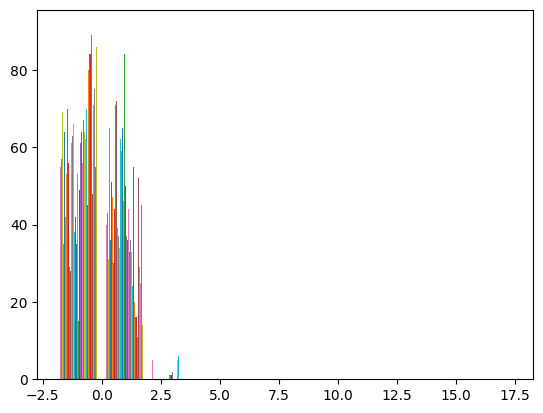

In [40]:
plt.hist(array_2[4][np.random.choice(256)])

In [41]:
def zscore_to_rgb(z, vmin, vmax):
    z_clipped = np.clip((z-vmin)/(vmax - vmin), 0, 1) #normalize between 0 and 1
    rgb = cm.turbo(z_clipped)[..., :3] # shape: (H, W, 3)
    rgb = np.transpose(rgb, (2, 0, 1)) # (3, H, W)
    return rgb.astype(np.float32)

In [42]:
rgb_tensor = zscore_to_rgb(array_2[4][np.random.choice(256)], vmin=-5, vmax=5)

In [43]:
from torchvision.transforms import Resize

In [44]:
resize = Resize((224, 224))
rgb_resized = resize(torch.tensor(rgb_tensor))

In [88]:
def zscore_to_rgb_tensor(z, vmin, vmax):
    """This function takes in the zscored coefficeints, and turns them into an RGB tensor via the turbo colormap"""
    z_clipped = np.clip((z - vmin )/(vmax - vmin), 0, 1)
    rgb = cm.turbo(z_clipped)[..., :3]
    rgb = np.transpose(rgb, (2, 0, 1))
    return torch.from_numpy(rgb).float()

def auto_layout_square(n):
    """This helper function computes the dimensions of the scalogram collage"""
    return math.ceil(math.sqrt(n)), math.ceil(math.sqrt(n))

def stitch_scalograms(rgb_list, layout):
    """This function stitched the scalograms together for the collage"""
    rows, cols = layout
    H, W = rgb_list[0].shape[1:] # get the right dimension
    total_tiles = rows * cols
    n_patches = len(rgb_list)
    n_missing = total_tiles - n_patches
    
    blank = torch.zeros((3, H, W), dtype=rgb_list[0].dtype) # make the padding arrays
    
    # it gets plotted from front to back so I need to the empty ones first
    full_list = rgb_list[:]
    if n_missing > 0:
        full_list += [blank] * n_missing
    
    stitched_rows = [ # stitches all of the rows together
        torch.cat(full_list[r * cols: (r + 1) * cols], dim=2)
        for r in range(rows)
    ] 
    
    stitched_rows = stitched_rows[::-1]
    return torch.cat(stitched_rows, dim=1) # concatenate on the height

def generate_scalogram(coefficients, sensor_indices, vmin, vmax, output_size=(224, 224)):
    rgb_list = []
    for idx in sensor_indices:
        z = coefficients[idx] # get the coefficients
        rgb = zscore_to_rgb_tensor(z, vmin=vmin, vmax=vmax) #transform them into rgb_tensors
        rgb_list.append(rgb)

    layout=auto_layout_square(len(sensor_indices)) # get layout dimensions
    collage = stitch_scalograms(rgb_list, layout=layout) # stitch em
    collage_resized = F.interpolate(collage.unsqueeze(0), size=output_size, mode='bicubic', align_corners=False).squeeze(0) #resize to AlexNet specs

    # return collage
    return collage_resized


In [93]:
list(range(246))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


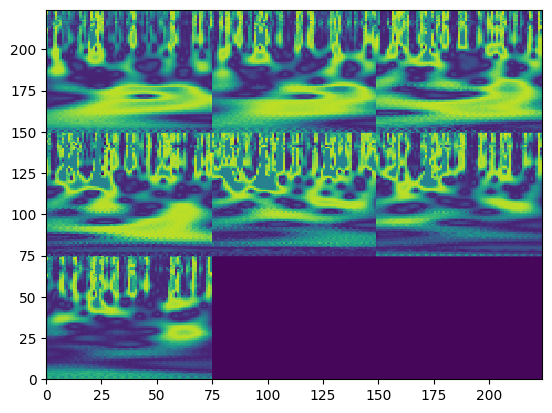

In [165]:
plt.pcolormesh(generate_scalogram(array, list([1, 2, 3, 4, 5, 6, 7]), vmin=-3, vmax=3)[0])

### ok now to find vmin and vmax for all of the different data types

we'll just take it as the mean of the 99th percentile for the zscores in each category

In [104]:
covert_producing_sensors = "/pasteur/appa/scratch/cbangu/coefficients/covert_producing"
covert_reading_sensors = "/pasteur/appa/scratch/cbangu/coefficients/covert_reading"
overt_producing_sensors = "/pasteur/appa/scratch/cbangu/coefficients/overt_producing"

In [119]:
p_min, p_max = [], []
all_files = len(os.listdir(covert_producing_sensors))
counter = 0
for file in os.listdir(covert_producing_sensors):
    np_file = os.path.join(covert_producing_sensors, file)
    file = np.load(np_file, mmap_mode="r")
    for epoch in file:
        for sensor in epoch:
            # get the outliers
            p_max.append(np.percentile(sensor, 99))
            p_min.append(np.percentile(sensor, 1))
    counter += 1
    if counter % 5 == 0:
        print(f"{counter} files done, {all_files - counter} left")
    

mean_max = np.array(p_max).mean()
mean_min = np.array(p_min).mean()

print(f"mean 99th percentile z_score: {mean_max}")
print(f"mean 1th percentile z_score: {mean_min}")

5 files done, 1129 left
10 files done, 1124 left
15 files done, 1119 left
20 files done, 1114 left
25 files done, 1109 left
30 files done, 1104 left
35 files done, 1099 left
40 files done, 1094 left
45 files done, 1089 left
50 files done, 1084 left
55 files done, 1079 left
60 files done, 1074 left
65 files done, 1069 left
70 files done, 1064 left
75 files done, 1059 left
80 files done, 1054 left
85 files done, 1049 left
90 files done, 1044 left
95 files done, 1039 left
100 files done, 1034 left
105 files done, 1029 left
110 files done, 1024 left
115 files done, 1019 left
120 files done, 1014 left
125 files done, 1009 left
130 files done, 1004 left
135 files done, 999 left
140 files done, 994 left
145 files done, 989 left
150 files done, 984 left
155 files done, 979 left
160 files done, 974 left
165 files done, 969 left
170 files done, 964 left
175 files done, 959 left
180 files done, 954 left
185 files done, 949 left
190 files done, 944 left
195 files done, 939 left
200 files done, 934

FileNotFoundError: [Errno 2] No such file or directory: '/pasteur/appa/scratch/cbangu/coefficients/covert_producing/BCOM_14_3_i_116_coefficients.npy'

In [2]:
dataset = AlexNetDataHandler("test_csv.csv", [0], coeff_augment_fn=None)

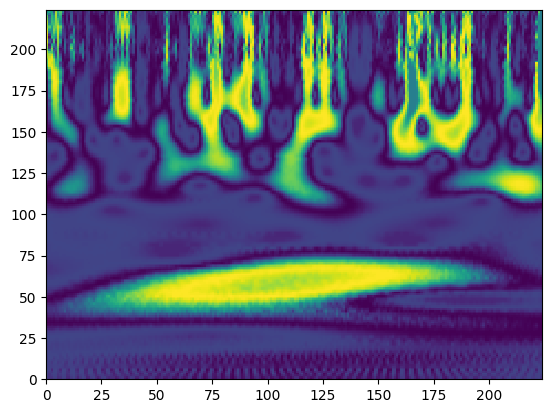

In [3]:
plt.pcolormesh(dataset.__getitem__(0)[0][0])

In [115]:
def apply_global_temporal_jitter(coeffs, max_shift=10):
    """Apply same temporal shift to all sensors."""
    shift = np.random.randint(-max_shift, max_shift + 1)
    jittered = np.zeros_like(coeffs)
    if shift > 0:
        jittered[:, :, shift:] = coeffs[:, :, :-shift]
    elif shift < 0:
        jittered[:, :, :shift] = coeffs[:, :, -shift:]
    else:
        jittered = coeffs
    return jittered

def temporal_jitter_reflect(coeffs, max_shift=10):
    """
    Applies temporal jitter by prepending reflect-padded values.
    Shape expected: (channels/ROIs, scales, time)
    """
    shift = np.random.randint(0, max_shift + 1)
    if shift == 0:
        return coeffs
    # Pad time dimension (axis=2)
    padded = np.pad(coeffs, ((0, 0), (0, 0), (shift, 0)), mode="reflect")
    return padded[:, :, :-shift]

def apply_local_augmentations(coeffs, noise_std=0.01, scale_range=(0.9, 1.1)):
    """Apply random per-sensor noise, scaling, and dropout."""

    coeffs = coeffs.copy()
    n_sensors = coeffs.shape[0]

    for i in range(n_sensors):
        scale = np.random.uniform(*scale_range) #signal amplitude
        coeffs[i] *= scale
        # Additive noise
        noise = np.random.normal(0, noise_std, size=coeffs[i].shape) # signal noise
        coeffs[i] += noise

    return coeffs

def temporal_jitter_local_resample(coeffs, max_shift=10, window=50):
    shift = np.random.randint(0, max_shift + 1)
    if shift == 0:
        return coeffs
    channels, scales, time = coeffs.shape
    if time < window:
        window = time  # fallback

    local = coeffs[:, :, :window]
    indices = np.random.randint(0, window, size=shift)
    fill = np.take(local, indices, axis=2)
    return np.concatenate([fill, coeffs[:, :, :-shift]], axis=2)

def linear_positive_shift(coeffs, max_shift=10, mode="reflect"):
    """
    Applies a positive (rightward) time shift to the coefficients.
    Pads with 'reflect' or 'constant' at the start.
    Accepts shape (n, scales, time) or (scales, time)
    """
    if coeffs.ndim == 2:
        coeffs = coeffs[None, :, :]  # add sensor/ROI dimension

    shift = np.random.randint(1, max_shift + 1)
    pad_mode = mode if mode in ["reflect", "constant"] else "reflect"

    padded = np.pad(coeffs, ((0, 0), (0, 0), (shift, 0)), mode=pad_mode)
    return padded[:, :, :coeffs.shape[2]]

def coeff_augment_fn(coeffs):
    coeffs = linear_positive_shift(coeffs, max_shift=100, mode='constant')
    coeffs = apply_local_augmentations(coeffs,
                                       noise_std=0.05,
                                       scale_range=(0.9, 1.1))
    return coeffs

In [124]:
dataset = AlexNetDataHandler("test_csv.csv", [0,2, 3, 4], coeff_augment_fn=coeff_augment_fn)
len(dataset)

2

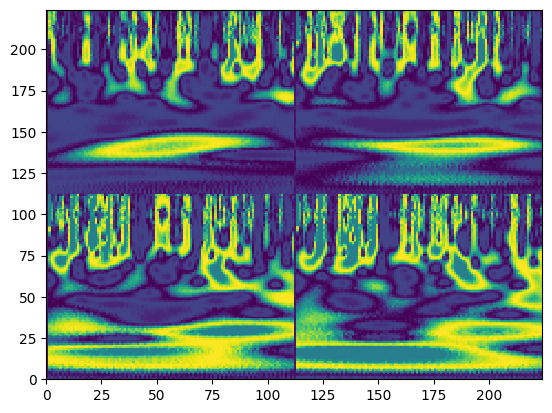

In [126]:
plt.pcolormesh(dataset.__getitem__(0)[0][0])

### train_test_split making for on the fly

In [6]:
covert_prod = "/pasteur/appa/scratch/cbangu/coefficients/covert_producing"
for file in os.listdir(covert_prod):
    parsed_file = file.split("_")
    print(parsed_file)
    break

['BCOM', '09', '2', 'ri', '146', 'coefficients', '7.npy']


In [8]:
covert_prod_roi = "/pasteur/appa/scratch/cbangu/coefficients/covert_producing_roi_beamforming"
for file in os.listdir(covert_prod_roi):
    parsed_file = file.split("_")
    print(parsed_file)
    break

['BCOM', '23', '2', 'le', '124', 'coefficients', 'sma', '1.npy']


In [2]:
def dir_to_dataframe(data_dir, vowel2id, speech2id, voweltype2id):
    """
    Convert a directory of files to a dataframe
    """
    df = pd.DataFrame({
        "FileName":[],
        "Label": [],
        "Vowel_Type": [],
        "Speech_Type": [],
    })
    
    for file in os.listdir(data_dir):
        if ".npy" in file:
            file_path = op.join(data_dir, file)
            parsed_file = file.split("_")
            
            label = parsed_file[3][1] if len(parsed_file[3]) > 1 else parsed_file[3][0]

            if label in vowel2id:
                label = int(vowel2id[label])
            else:
                raise ValueError(f"Label {label} not in vowel2id")
            
            speech_type = int(len(parsed_file[4]))
            if speech_type in speech2id:
                speech_type = speech2id[speech_type]
            else:
                raise ValueError(f"Speech type {speech_type} not in speech2id")
            
            vowel_type = int(len(parsed_file[3]))
            if vowel_type in voweltype2id:
                vowel_type = voweltype2id[vowel_type]
            else:
                raise ValueError(f"Vowel type {vowel_type} not in voweltype2id")
            
            df = pd.concat([df, pd.DataFrame({"FileName": [file_path], "Label": [label], "Vowel_Type":[vowel_type], "Speech_Type": [speech_type]})], ignore_index=True)
    
    return df

In [3]:
vowel2id = {
    'a': 0,
    'e': 1,
    'i': 2,
}

speech2id = {
    3: 1, # producing
    2: 0, # reading
}

voweltype2id = {
    1: 'pure',
    2: 'composite',
}

### so let's do the sensor space first to try it out cause the logic should be easier

In [13]:
df_covert_prod = dir_to_dataframe(
    data_dir = "/pasteur/appa/scratch/cbangu/coefficients/covert_producing_roi_beamforming",
    vowel2id=vowel2id,
    speech2id=speech2id,
    voweltype2id=voweltype2id
)
df_covert_read = dir_to_dataframe(
    data_dir = "/pasteur/appa/scratch/cbangu/coefficients/covert_reading_roi_beamforming",
    vowel2id=vowel2id,
    speech2id=speech2id,
    voweltype2id=voweltype2id
)
df_overt_prod = dir_to_dataframe(
    data_dir = "/pasteur/appa/scratch/cbangu/coefficients/overt_producing",
    vowel2id=vowel2id,
    speech2id=speech2id,
    voweltype2id=voweltype2id
)

In [14]:
def dataframe_to_train_test_covert(df_covert_prod, df_covert_read, roi=None, pure=False, prod=False):
    if roi:
        df_covert_prod = df_covert_prod[df_covert_prod['FileName'].str.contains(roi)]
        df_covert_read = df_covert_read[df_covert_read['FileName'].str.contains(roi)]
    
    if prod:
        df = df_covert_prod
        
    else:    
        reading_sample = df_covert_read.sample(n=len(df_covert_prod), random_state=42)
        df = pd.concat([df_covert_prod, reading_sample])
    
    if pure:
        df = df[df['Vowel_Type']=="pure"]
    x, y = train_test_split(
        df, 
        test_size=0.1,
        stratify=df["Label"],
        random_state=42,
        shuffle=True,
    )
    
    dataframes = [x, y]
    for i, df in enumerate(dataframes):
        df["Label"] = df["Label"].astype(int) # type enforcement
        df["FileName"] = df["FileName"].astype(str) # type enforcement
        df = df.drop(columns=["Speech_Type", "Vowel_Type"]) # drop unnecessary columns
        dataframes[i] = df
        df = df.reset_index(drop=True)
    
    (
      x, y
    ) = dataframes
    
    return x, y

In [20]:
x, y = dataframe_to_train_test_covert(df_covert_prod, df_covert_read, roi='broca', pure=True, prod=False)
x.head(5)['FileName'][24227]

'/pasteur/appa/scratch/cbangu/coefficients/covert_reading_roi_beamforming/BCOM_11_3_i_16_coefficients_broca_12.npy'

In [ ]:
def dataframe_to_train_test_covert_covert(df_covert_prod, df_covert_read, roi=None, pure=False):
    if roi:
        df_covert_prod = df_covert_prod[df_covert_prod['FileName'].str.contains(roi)]
        df_covert_read = df_covert_read[df_covert_read['FileName'].str.contains(roi)]
        df_overt_prod = df_overt_prod[df_overt_prod['FileName'].str.contains(roi)]
        
        reading_sample = df_covert_read.sample(n=len(df_covert_prod), random_state=42)
        df = pd.concat([df_covert_prod, reading_sample])
    
    else:    
        reading_sample = df_covert_read.sample(n=len(df_covert_prod), random_state=42)
        df = pd.concat([df_covert_prod, reading_sample])
    
    if pure:
        df = df[df['Vowel_Type']=="pure"]
        
    x, y = train_test_split(
        df, 
        test_size=0.1,
        stratify=df["Speech_Type"],
        random_state=42,
        shuffle=True,
    )
    
    dataframes = [x, y]
    for i, df in enumerate(dataframes):
        df = df.drop(columns=["Label", "Vowel_Type"]) # drop unnecessary columns
        df = df.rename(columns=["Speech_Type", "Label"]) # drop unnecessary columns
        df["Label"] = df["Label"].astype(int) # type enforcement
        df["FileName"] = df["FileName"].astype(str) # type enforcement

        dataframes[i] = df
        df = df.reset_index(drop=True)
    
    (
      x, y
    ) = dataframes
    
    return x, y

In [ ]:
def dataframe_to_train_test_covert_overt(df_covert_prod, df_covert_read, df_overt_prod, roi=None, pure=False, reading=False):
    if roi:
        df_covert_prod = df_covert_prod[df_covert_prod['FileName'].str.contains(roi)]
        df_covert_read = df_covert_read[df_covert_read['FileName'].str.contains(roi)]
        df_overt_prod = df_overt_prod[df_overt_prod['FileName'].str.contains(roi)]
    
    if reading:
        reading_sample = df_covert_read.sample(n=len(df_overt_prod), random_state=42)
        df = pd.concat([df_overt_prod, reading_sample])
    else:
        producing_sample = df_covert_producing.sample(n=len(df_overt_prod), random_state=42)
        df = pd.concat([df_overt_prod, reading_sample])
    
    if pure:
        df = df[df['Vowel_Type']=="pure"]
        
    df['covert_overt'] = df['FileName'].apply(lambda x: 1 if "covert" in x else 0)
        
    x, y = train_test_split(
        df, 
        test_size=0.1,
        stratify=df["covert_overt"],
        random_state=42,
        shuffle=True,
    )
    
    dataframes = [x, y]
    for i, df in enumerate(dataframes):
        df = df.drop(columns=["Label", "Vowel_Type", "Speech_Type"]) # drop unnecessary columns
        df = df.rename(columns=["covert_overt", "Label"]) # drop unnecessary columns
        df["Label"] = df["Label"].astype(int) # type enforcement
        df["FileName"] = df["FileName"].astype(str) # type enforcement

        dataframes[i] = df
        df = df.reset_index(drop=True)
    
    (
      x, y
    ) = dataframes
    
    return x, y

In [ ]:
def dataframe_to_train_test_overt(df_overt_prod, roi=None, pure=False):
    if roi:
        df_covert_prod = df_covert_prod[df_covert_prod['FileName'].str.contains(roi)]
    
    if pure:
        df = df[df['Vowel_Type']=="pure"]
        
    x, y = train_test_split(
        df, 
        test_size=0.1,
        stratify=df["Label"],
        random_state=42,
        shuffle=True,
    )
    
    dataframes = [x, y]
    for i, df in enumerate(dataframes):
        df["Label"] = df["Label"].astype(int) # type enforcement
        df["FileName"] = df["FileName"].astype(str) # type enforcement
        df = df.drop(columns=["Speech_Type", "Vowel_Type"]) # drop unnecessary columns
        dataframes[i] = df
        df = df.reset_index(drop=True)
    
    (
      x, y
    ) = dataframes
    
    return x, y

In [43]:
## only covert producing & pure vowels
cp_pure_train, cp_pure_test = train_test_split(
    df_covert_prod[df_covert_prod['Vowel_Type']=="pure"], 
    test_size=0.1,
    stratify=df_covert_prod[df_covert_prod['Vowel_Type']=="pure"]["Label"],
    random_state=42,
    shuffle=True)

dataframes = [cp_pure_train, cp_pure_test]
for i, df in enumerate(dataframes):
        df["Label"] = df["Label"].astype(int) # type enforcement
        df["FileName"] = df["FileName"].astype(str) # type enforcement
        df = df.drop(columns=["Speech_Type", "Vowel_Type"]) # drop unnecessary columns
        dataframes[i] = df
        df = df.reset_index(drop=True)
    
(
  cp_pure_train, cp_pure_test
) = dataframes

cp_pure_train.to_csv(op.join(covert_root_path, "covert_pure_producing_train.csv"))
cp_pure_test.to_csv(op.join(covert_root_path, "covert_pure_producing_test.csv"))

In [47]:
## only covert producing & composite vowels
cp_composite_train, cp_composite_test = train_test_split(
    df_covert_prod, 
    test_size=0.1,
    stratify=df_covert_prod["Label"],
    random_state=42,
    shuffle=True)

dataframes = [cp_composite_train, cp_composite_test]
for i, df in enumerate(dataframes):
        df["Label"] = df["Label"].astype(int) # type enforcement
        df["FileName"] = df["FileName"].astype(str) # type enforcement
        df = df.drop(columns=["Speech_Type", "Vowel_Type"]) # drop unnecessary columns
        dataframes[i] = df
        df = df.reset_index(drop=True)
    
(
  cp_composite_train, cp_composite_test
) = dataframes

cp_composite_train.to_csv(op.join(covert_root_path, "covert_composite_producing_train.csv"))
cp_composite_test.to_csv(op.join(covert_root_path, "covert_composite_producing_test.csv"))

In [53]:
## covert producing and covert reading, pure vowels
# first equalize samples:
reading_sample = df_covert_read.sample(n=len(df_covert_prod), random_state=42)
cpr = pd.concat([df_covert_prod, reading_sample], ignore_index=True)

cpr_pure_train, cpr_pure_test = train_test_split(
    cpr[cpr['Vowel_Type']=='pure'],
    test_size=0.1,
    stratify=cpr_pure[cpr_pure['Vowel_Type']=="pure"]["Label"],
    random_state=42,
    shuffle=True
)

dataframes = [cpr_pure_train, cpr_pure_test]
for i, df in enumerate(dataframes):
        df["Label"] = df["Label"].astype(int) # type enforcement
        df["FileName"] = df["FileName"].astype(str) # type enforcement
        df = df.drop(columns=["Speech_Type", "Vowel_Type"]) # drop unnecessary columns
        dataframes[i] = df
        df = df.reset_index(drop=True)
    
(
  cpr_pure_train, cpr_pure_test
) = dataframes

cpr_pure_train.to_csv(op.join(covert_root_path, "covert_pure_readprod_train.csv"))
cpr_pure_test.to_csv(op.join(covert_root_path, "covert_pure_readprod_test.csv"))


,FileName,Label,Vowel_Type,Speech_Type
0,/pasteur/appa/scratch/cbangu/coefficients/cove...,2.0,composite,1.0
1,/pasteur/appa/scratch/cbangu/coefficients/cove...,2.0,composite,1.0
2,/pasteur/appa/scratch/cbangu/coefficients/cove...,0.0,composite,1.0
3,/pasteur/appa/scratch/cbangu/coefficients/cove...,0.0,pure,1.0
4,/pasteur/appa/scratch/cbangu/coefficients/cove...,0.0,composite,1.0
...,...,...,...,...
25407,/pasteur/appa/scratch/cbangu/coefficients/cove...,1.0,pure,0.0
25408,/pasteur/appa/scratch/cbangu/coefficients/cove...,2.0,composite,0.0
25409,/pasteur/appa/scratch/cbangu/coefficients/cove...,1.0,pure,0.0
25410,/pasteur/appa/scratch/cbangu/coefficients/cove...,0.0,composite,0.0


In [ ]:
## now all the vowels
cpr_composite_train, cpr_composite_test = train_test_split(
    cpr,
    test_size=0.1,
    stratify=cpr["Label"],
    random_state=42,
    shuffle=True
)

dataframes = [cpr_composite_train, cpr_composite_test]
for i, df in enumerate(dataframes):
        df["Label"] = df["Label"].astype(int) # type enforcement
        df["FileName"] = df["FileName"].astype(str) # type enforcement
        df = df.drop(columns=["Speech_Type", "Vowel_Type"]) # drop unnecessary columns
        dataframes[i] = df
        df = df.reset_index(drop=True)
    
(
  cpr_composite_train, cpr_composite_test
) = dataframes

cpr_composite_train.to_csv(op.join(covert_root_path, "covert_composite_readprod_train.csv"))
cpr_composite_test.to_csv(op.join(covert_root_path, "covert_composite_readprod_test.csv"))

In [ ]:
## now covert producing vs. covert reading

In [29]:
df_covert_prod_roi = dir_to_dataframe(
    data_dir = "/pasteur/appa/scratch/cbangu/coefficients/covert_producing_roi_beamforming",
    vowel2id=vowel2id,
    speech2id=speech2id,
    voweltype2id=voweltype2id
)
df_covert_read_roi = dir_to_dataframe(
    data_dir = "/pasteur/appa/scratch/cbangu/coefficients/covert_reading_roi_beamforming",
    vowel2id=vowel2id,
    speech2id=speech2id,
    voweltype2id=voweltype2id
)
df_overt_prod_roi = dir_to_dataframe(
    data_dir = "/pasteur/appa/scratch/cbangu/coefficients/overt_producing_roi_beamforming",
    vowel2id=vowel2id,
    speech2id=speech2id,
    voweltype2id=voweltype2id
)

'/pasteur/appa/scratch/cbangu/coefficients/covert_producing_roi_beamforming/BCOM_23_2_le_124_coefficients_sma_1.npy'